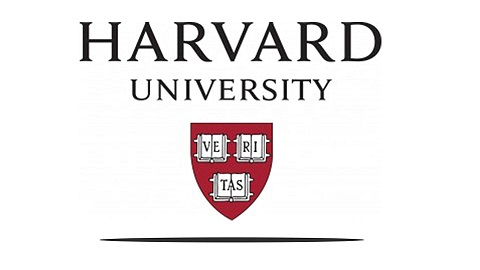
# Harvard University 2015 Course Enrollments


## About the Dataset

The [Harvard University 2015 dataset](https://www.kaggle.com/harvard-university/course-enrollment-stats) has been taken from Kaggle. This dataset contains enrollment numbers for every course offered at Harvard during Fall Term 2015. Let's take a closer look at the Harvard 2015 Course Enrollments table data dictionary, which is a description of the fields (columns) in the table (the .csv file we will import below):

- **COURSE** -
The course name (consists of the department/program abbreviation and a course number/letter; the abbreviation and the number/letter are separated by a space)


- **DEPARTMENT** - 
The abbreviation for this course's department


- **COURSEID** -
A unique identifier for the course


- **CLASSNBR** -
Another unique identifier for the course


- **TOTALENROLLMENT** - 
Total number of students enrolled, from every school


- **GSAS** -
Number of students enrolled from the Graduate School of Arts and Sciences


- **HCOL** -
Number of students enrolled from Harvard College (undergraduate)


- **NONDGR** -
Number of non-degree-seeking students enrolled


- **VUS** -
Number of students enrolled from the Visiting Undergraduate Students Program


- **XREG** -
Number of students from other universities who are cross-registered in the course

A full data dictionary can be viewed [here](https://www.kaggle.com/harvard-university/course-enrollment-stats).
##### Note that there is also a row whose COURSE value is TOTALS: and whose DEPARTMENT, COURSEID, and CLASSNBR values are empty. This row lists the total number of students from each school (GSAS, HCOL, etc) in all of the courses.

## Project Objectives
- Create a Pandas application on Jupyter Notebooks using the Harvard University 2015 Course Enrollments dataset

- Clean the data (handle null values and outliers)

- Identify top 5 courses taken by undergraduate, graduate, nondegree, visiting and cross registered students and also identify departments with most number of students from each of the above categories

- Examine the relationship between total enrollments and graduate students, total enrollments and undergraduate students and graduate students and undergraduate students

## Importing Pandas, Numpy, Matplotlib, Sklearn and Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import seaborn as sns

# set the plots to display in the Jupyter notebook
%matplotlib inline

# change plotting colors per client request
plt.style.use('ggplot')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [2]:
# we can see the details about the imported package by referencing its private class properties:
print(f'I am using {pd.__name__} \
Version: {pd.__version__}.\n\
It is installed at: {pd.__path__}')

I am using pandas Version: 1.0.1.
It is installed at: ['C:\\Users\\ruchi\\anaconda3\\lib\\site-packages\\pandas']


## Reading in Data

When we read data into memory in Python, we are creating an object. Because we are working with a CSV, we will use the read CSV method.

In [3]:
# read the dataset as a DataFrame into a variable named 'harvard'
harvard = pd.read_csv('harvard-course-enrollment-fall-2015.csv')

We have just created a `DataFrame` for the Harvard University 2015 course enrollments. We will use this `DataFrame` for further analysis in this project.

In [4]:
# show the type of this 'harvard' dataset
type(harvard)

pandas.core.frame.DataFrame

## Inspecting our DataFrame

We'll now perform basic operations on the DataFrame, denoted with comments.

In [5]:
# show the head of this dataset
harvard.head()

,COURSE,DEPARTMENT,COURSEID,CLASSNBR,TOTALENROLLMENT,GSAS,HCOL,NONDGR,VUS,XREG
0,AESTHINT 13,GENED,123834.0,13038.0,51.0,NaN,48.0,1.0,1.0,1.0
1,AESTHINT 24,GENED,110744.0,10514.0,198.0,NaN,198.0,NaN,NaN,NaN
2,AESTHINT 33,GENED,124912.0,14909.0,27.0,NaN,27.0,NaN,NaN,NaN
3,AESTHINT 37,GENED,126284.0,13724.0,77.0,NaN,77.0,NaN,NaN,NaN
4,AESTHINT 39,GENED,124661.0,13235.0,37.0,NaN,37.0,NaN,NaN,NaN


In [155]:
# print the last 5 rows
harvard.tail(5)

,COURSE,DEPARTMENT,COURSEID,CLASSNBR,TOTALENROLLMENT,GSAS,HCOL,NONDGR,VUS,XREG
2864,YIDDISH CA,NELC,123432.0,12772.0,2.0,NaN,2.0,NaN,NaN,NaN
2865,YORUBA AA,AAAS,120952.0,15176.0,7.0,NaN,6.0,NaN,NaN,1.0
2866,YORUBA BA,AAAS,120953.0,15177.0,5.0,1.0,4.0,NaN,NaN,NaN
2867,YORUBA 101AR,AAAS,120954.0,13114.0,3.0,1.0,2.0,NaN,NaN,NaN
2868,TOTALS:,NaN,NaN,NaN,38238.0,9912.0,26840.0,255.0,204.0,1024.0


In [156]:
# identify the shape (rows by columns)
harvard.shape

(2869, 10)

In [157]:
# print the number of rows
len(harvard)

2869

In [158]:
#Alternatively, you can also use harvard.shape[0] to get the number of rows
harvard.shape[0] 

2869

In [159]:
#prints the number of columns
harvard.shape[1] 

10

In [160]:
# displays the index as it sits (auto-generated upon import)
harvard.index

RangeIndex(start=0, stop=2869, step=1)

In [8]:
# Here we are looking at three columns;
# the one on the left is the index (automatically generated upon import by pandas)
# 'COURSEID' is our PK (primary key) from our imported table. 'Course is a data column.
harvard.head(3)[['COURSEID', 'COURSE']]

,COURSEID,COURSE
0,123834.0,AESTHINT 13
1,110744.0,AESTHINT 24
2,124912.0,AESTHINT 33


In [162]:
# print all the columns
harvard.columns

Index(['COURSE', 'DEPARTMENT', 'COURSEID', 'CLASSNBR', 'TOTALENROLLMENT',
       'GSAS', 'HCOL', 'NONDGR', 'VUS', 'XREG'],
      dtype='object')

In [163]:
harvard.dtypes 

COURSE              object
DEPARTMENT          object
COURSEID           float64
CLASSNBR           float64
TOTALENROLLMENT    float64
GSAS               float64
HCOL               float64
NONDGR             float64
VUS                float64
XREG               float64
dtype: object

In [164]:
type(harvard["COURSE"]) #checks the datatype

pandas.core.series.Series

In [165]:
# show the difference in data types by using single and double square brackets
harvard[['COURSE']]

,COURSE
0,AESTHINT 13
1,AESTHINT 24
2,AESTHINT 33
3,AESTHINT 37
4,AESTHINT 39
...,...
2864,YIDDISH CA
2865,YORUBA AA
2866,YORUBA BA
2867,YORUBA 101AR


In [166]:
# show the difference in data types by using single and double square brackets
harvard['COURSE']

0        AESTHINT   13
1        AESTHINT   24
2        AESTHINT   33
3        AESTHINT   37
4        AESTHINT   39
             ...      
2864    YIDDISH     CA
2865     YORUBA     AA
2866     YORUBA     BA
2867     YORUBA  101AR
2868           TOTALS:
Name: COURSE, Length: 2869, dtype: object

## Data Cleaning 

In [167]:
#dropping the TOTALS: row to eliminate outliers during further analysis and visualization of data
harvard.drop(index=2868, inplace=True)

In [168]:
#the TOTALS: row has been dropped, as displayed below
harvard.tail()

,COURSE,DEPARTMENT,COURSEID,CLASSNBR,TOTALENROLLMENT,GSAS,HCOL,NONDGR,VUS,XREG
2863,YIDDISH BA,NELC,119874.0,12981.0,1.0,1.0,NaN,NaN,NaN,NaN
2864,YIDDISH CA,NELC,123432.0,12772.0,2.0,NaN,2.0,NaN,NaN,NaN
2865,YORUBA AA,AAAS,120952.0,15176.0,7.0,NaN,6.0,NaN,NaN,1.0
2866,YORUBA BA,AAAS,120953.0,15177.0,5.0,1.0,4.0,NaN,NaN,NaN
2867,YORUBA 101AR,AAAS,120954.0,13114.0,3.0,1.0,2.0,NaN,NaN,NaN


In [169]:
#the index is now named as the Course ID
harvard.set_index('COURSEID', inplace=True) 

In [170]:
#The Course ID below is the index
harvard.index.name 

'COURSEID'

In [171]:
#renaming columns
harvard = harvard.rename(columns={'GSAS': 'GRADSTUDENTS', 'HCOL': 'UNDERGRADSTUDENTS', 'NONDGR': 'NONDEGREESTUDENTS', 'VUS': 'VISITINGSTUDENTS', 'XREG': 'CROSSREGISTERED'})

In [172]:
harvard.head()

,COURSE,DEPARTMENT,CLASSNBR,TOTALENROLLMENT,GRADSTUDENTS,UNDERGRADSTUDENTS,NONDEGREESTUDENTS,VISITINGSTUDENTS,CROSSREGISTERED
COURSEID,,,,,,,,,
123834.0,AESTHINT 13,GENED,13038.0,51.0,NaN,48.0,1.0,1.0,1.0
110744.0,AESTHINT 24,GENED,10514.0,198.0,NaN,198.0,NaN,NaN,NaN
124912.0,AESTHINT 33,GENED,14909.0,27.0,NaN,27.0,NaN,NaN,NaN
126284.0,AESTHINT 37,GENED,13724.0,77.0,NaN,77.0,NaN,NaN,NaN
124661.0,AESTHINT 39,GENED,13235.0,37.0,NaN,37.0,NaN,NaN,NaN


In [173]:
#identifying courses that are unnamed
harvard['COURSE'].value_counts()

EXPOS   20         50
SYSTBIO  350       26
HIST 3010          22
HIST 3000          21
BIOSTAT  350       18
                   ..
MATH  136           1
NEUROBIO  101A      1
XPBH     RDS280     1
ECON  985RA         1
GHHP   91           1
Name: COURSE, Length: 2413, dtype: int64

In [174]:
#identifying departments that are not listed/unnamed (note that 338 courses have not been categorized into any department)
harvard['DEPARTMENT'].value_counts()

NODEPT    338
MDSC      267
SEAS      173
ROML      110
PSYC      105
         ... 
EMR         2
BSDM        1
PSCI        1
FAS         1
HSS         1
Name: DEPARTMENT, Length: 68, dtype: int64

In [175]:
#removing the 'NODEPT' category to avoid any outliers in data analysis and visualization
harvard = harvard[harvard['DEPARTMENT'] != 'NODEPT']

In [176]:
harvard['DEPARTMENT'].value_counts()

MDSC    267
SEAS    173
ROML    110
PSYC    105
HIST     98
       ... 
URBP      2
PSCI      1
BSDM      1
FAS       1
HSS       1
Name: DEPARTMENT, Length: 67, dtype: int64

In [177]:
#checking for null values 
harvard.isnull().sum().sort_values(ascending=False)

VISITINGSTUDENTS     2443
NONDEGREESTUDENTS    2401
CROSSREGISTERED      2119
UNDERGRADSTUDENTS    1241
GRADSTUDENTS          829
TOTALENROLLMENT         0
CLASSNBR                0
DEPARTMENT              0
COURSE                  0
dtype: int64

In [178]:
#The 'TOTALENROLLMENT' column is the sum of the GRADSTUDENTS, UNDERGRADSTUDENTS, NONDEGREESTUDENTS, VISITINGSTUDENTS and CROSSREGISTERED columns. Hence, null values have been replaced with '0'. The 'NaN' indicates that there are 0 students enrolled for the course. 
harvard = harvard.fillna(0)
harvard

,COURSE,DEPARTMENT,CLASSNBR,TOTALENROLLMENT,GRADSTUDENTS,UNDERGRADSTUDENTS,NONDEGREESTUDENTS,VISITINGSTUDENTS,CROSSREGISTERED
COURSEID,,,,,,,,,
123834.0,AESTHINT 13,GENED,13038.0,51.0,0.0,48.0,1.0,1.0,1.0
110744.0,AESTHINT 24,GENED,10514.0,198.0,0.0,198.0,0.0,0.0,0.0
124912.0,AESTHINT 33,GENED,14909.0,27.0,0.0,27.0,0.0,0.0,0.0
126284.0,AESTHINT 37,GENED,13724.0,77.0,0.0,77.0,0.0,0.0,0.0
124661.0,AESTHINT 39,GENED,13235.0,37.0,0.0,37.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
119874.0,YIDDISH BA,NELC,12981.0,1.0,1.0,0.0,0.0,0.0,0.0
123432.0,YIDDISH CA,NELC,12772.0,2.0,0.0,2.0,0.0,0.0,0.0
120952.0,YORUBA AA,AAAS,15176.0,7.0,0.0,6.0,0.0,0.0,1.0


## Data Analysis and Visualization

In [179]:
# Sorting the Total Enrollment in descending order
harvard.sort_values(by='TOTALENROLLMENT', ascending=False)

,COURSE,DEPARTMENT,CLASSNBR,TOTALENROLLMENT,GRADSTUDENTS,UNDERGRADSTUDENTS,NONDEGREESTUDENTS,VISITINGSTUDENTS,CROSSREGISTERED
COURSEID,,,,,,,,,
152514.0,COMPSCI 50,SEAS,14355.0,787.0,11.0,683.0,1.0,10.0,82.0
113326.0,ECON 10A,ECON,11513.0,709.0,0.0,703.0,0.0,4.0,2.0
156035.0,ETHRSON 39,GENED,11136.0,524.0,0.0,510.0,0.0,14.0,0.0
110766.0,STAT 110,STAT,14560.0,463.0,47.0,408.0,2.0,2.0,4.0
121189.0,LIFESCI 1A,LSCI,14467.0,433.0,0.0,432.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
156737.0,OEB 309,BIOE,11611.0,1.0,1.0,0.0,0.0,0.0,0.0
115587.0,HIND-URD 105R,SAST,17372.0,1.0,1.0,0.0,0.0,0.0,0.0
114942.0,ROM-STD 98,ROML,11893.0,1.0,0.0,1.0,0.0,0.0,0.0


The COMPSCI 50 course from the SEAS department has the highest number of students enrolled (787 students enrolled), followed by the ECON 10A course from the ECON department (709 students enrolled) and the ETHRSON 39 course from the GENED department (524 students enrolled).

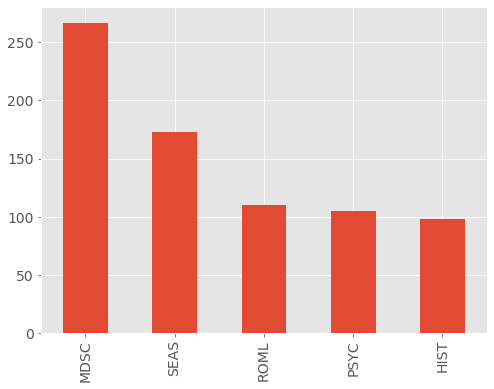

In [180]:
#plotting a bar graph on the departments
harvard['DEPARTMENT'].value_counts().head().plot(kind='bar');

The Medical Sciences Department in Harvard University consisted of the highest number of student enrollments in 2015.

In [181]:
#creating a list consisting of the most important columns 
special_cols = ['COURSE', 'DEPARTMENT','TOTALENROLLMENT', 'GRADSTUDENTS', 'UNDERGRADSTUDENTS', 'NONDEGREESTUDENTS', 'VISITINGSTUDENTS', 'CROSSREGISTERED']

In [182]:
#summary statistics for each column
harvard[special_cols].describe()

,TOTALENROLLMENT,GRADSTUDENTS,UNDERGRADSTUDENTS,NONDEGREESTUDENTS,VISITINGSTUDENTS,CROSSREGISTERED
count,2530.000000,2530.000000,2530.000000,2530.000000,2530.000000,2530.000000
mean,14.113043,3.075494,10.499605,0.061265,0.070751,0.404743
std,37.698874,6.780656,36.134609,0.286443,0.560438,2.122908
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,13.000000,3.000000,10.000000,0.000000,0.000000,0.000000
max,787.000000,144.000000,703.000000,4.000000,14.000000,82.000000


In [183]:
#grouping data by Department and Course to identify top 5 courses and top 5 departments (courses and departments with highest number of student enrollments)
df_dept = harvard[special_cols].groupby(by=['DEPARTMENT'])
df_course = harvard[special_cols].groupby(by=['COURSE'])

In [184]:
#Assigning both dataframes to new dataframes "dept" and "course" respectively
dept = df_dept.sum()
course = df_course.sum()

In [185]:
#displaying special_cols grouped by Department 
dept

,TOTALENROLLMENT,GRADSTUDENTS,UNDERGRADSTUDENTS,NONDEGREESTUDENTS,VISITINGSTUDENTS,CROSSREGISTERED
DEPARTMENT,,,,,,
AAAS,493.0,56.0,406.0,3.0,0.0,28.0
AMER,33.0,32.0,0.0,1.0,0.0,0.0
ANTH,393.0,118.0,243.0,5.0,0.0,27.0
ASTR,215.0,151.0,63.0,0.0,0.0,1.0
BIOE,425.0,184.0,234.0,1.0,0.0,6.0
...,...,...,...,...,...,...
SOST,271.0,0.0,270.0,0.0,0.0,1.0
STAT,1444.0,344.0,1027.0,8.0,15.0,50.0
URBP,2.0,2.0,0.0,0.0,0.0,0.0


In [186]:
#displaying summary statistics for each column which has been grouped by Department Name
dept.describe()

,TOTALENROLLMENT,GRADSTUDENTS,UNDERGRADSTUDENTS,NONDEGREESTUDENTS,VISITINGSTUDENTS,CROSSREGISTERED
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,532.925373,116.134328,396.477612,2.313433,2.671642,15.283582
std,841.467249,203.206411,732.156536,3.525702,9.084432,26.879533
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,87.000000,2.500000,21.000000,0.000000,0.000000,0.000000
50%,214.000000,61.000000,173.000000,1.000000,0.000000,2.000000
75%,691.000000,128.500000,439.500000,3.000000,1.000000,23.500000
max,4799.000000,1317.000000,4724.000000,18.000000,62.000000,160.000000


In [187]:
#displaying special_cols grouped by Course Name 
course

,TOTALENROLLMENT,GRADSTUDENTS,UNDERGRADSTUDENTS,NONDEGREESTUDENTS,VISITINGSTUDENTS,CROSSREGISTERED
COURSE,,,,,,
AESTHINT 13,51.0,0.0,48.0,1.0,1.0,1.0
AESTHINT 24,198.0,0.0,198.0,0.0,0.0,0.0
AESTHINT 33,27.0,0.0,27.0,0.0,0.0,0.0
AESTHINT 37,77.0,0.0,77.0,0.0,0.0,0.0
AESTHINT 39,37.0,0.0,37.0,0.0,0.0,0.0
...,...,...,...,...,...,...
YIDDISH BA,1.0,1.0,0.0,0.0,0.0,0.0
YIDDISH CA,2.0,0.0,2.0,0.0,0.0,0.0
YORUBA AA,7.0,0.0,6.0,0.0,0.0,1.0


In [188]:
#displaying summary statistics for each column which has been grouped by Course Name
course.describe()

,TOTALENROLLMENT,GRADSTUDENTS,UNDERGRADSTUDENTS,NONDEGREESTUDENTS,VISITINGSTUDENTS,CROSSREGISTERED
count,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000
mean,17.100575,3.726533,12.722222,0.074234,0.085728,0.490421
std,44.151723,7.811779,42.636791,0.313789,0.615895,2.345137
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,14.000000,4.000000,10.000000,0.000000,0.000000,0.000000
max,787.000000,144.000000,703.000000,4.000000,14.000000,82.000000


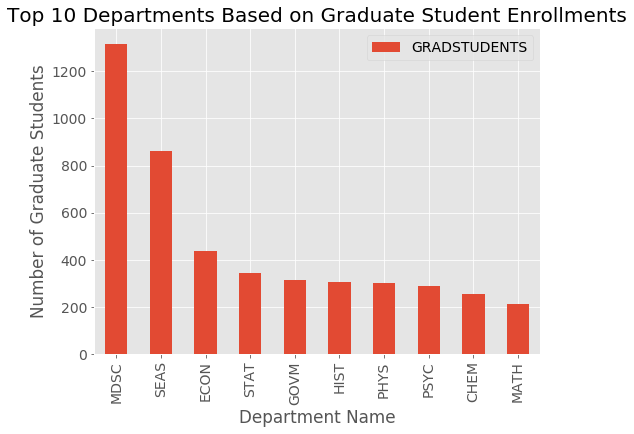

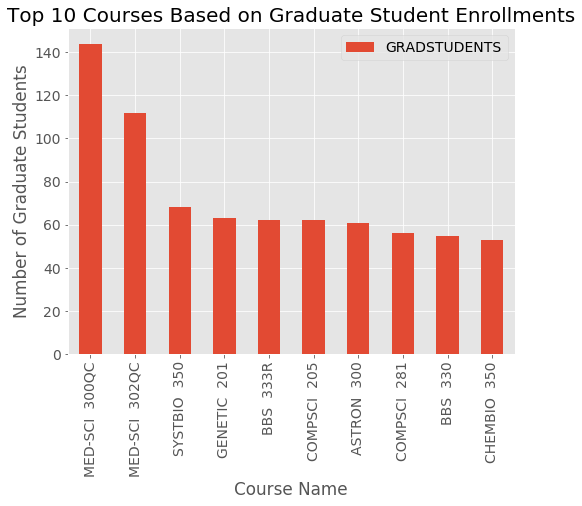

In [189]:
#plotting bar graphs to display the top 10 departments and courses with highest number of graduate student enrollments
dept[['GRADSTUDENTS']].sort_values('GRADSTUDENTS', ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Departments Based on Graduate Student Enrollments', fontsize = 20)
plt.xlabel('Department Name')
plt.ylabel('Number of Graduate Students');

course[['GRADSTUDENTS']].sort_values('GRADSTUDENTS', ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Courses Based on Graduate Student Enrollments', fontsize = 20)
plt.xlabel('Course Name')
plt.ylabel('Number of Graduate Students');

- The top 5 departments with highest number of graduate enrollments are:
  - Harvard Medical School
  - School Of Engineering And Applied Sciences
  - Department of Economics
  - Harvard Statistics Department
  - Department of Government 

- MED-SCI 300QC is the course with highest number of graduate enrollments, a course from the Harvard Medical School which consists of the highest number of graduate students. 
- It is noted that there are a number of courses within the Top 10 category that belong to the School of Engineering and Applied Sciences. 
- However, none of the top 10 courses listed above belong to the Department of Economics, which is the 3rd amongst the top 10 departments displayed above. 

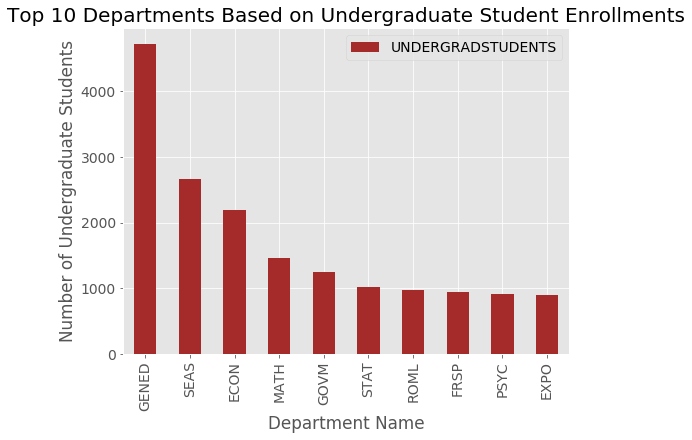

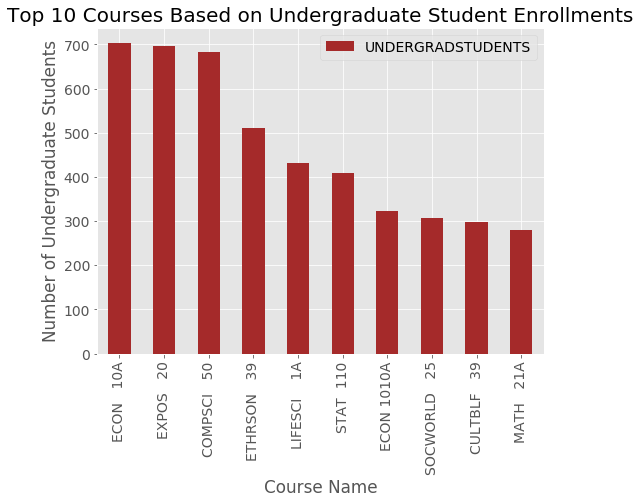

In [190]:
#plotting bar graphs to display the top 10 departments and courses with highest number of undergraduate student enrollments
dept[['UNDERGRADSTUDENTS']].sort_values('UNDERGRADSTUDENTS', ascending=False).head(10).plot(kind='bar', color='brown')
plt.title('Top 10 Departments Based on Undergraduate Student Enrollments', fontsize = 20)
plt.xlabel('Department Name')
plt.ylabel('Number of Undergraduate Students');

course[['UNDERGRADSTUDENTS']].sort_values('UNDERGRADSTUDENTS', ascending=False).head(10).plot(kind='bar', color='brown')
plt.title('Top 10 Courses Based on Undergraduate Student Enrollments', fontsize = 20)
plt.xlabel('Course Name')
plt.ylabel('Number of Undergraduate Students');

- The top 5 departments with highest number of undergraduate enrollments are:
  - Harvard College Program in General Education
  - School Of Engineering And Applied Sciences
  - Department of Economics
  - Mathematics Department
  - Department of Government 

- ECON 10A is the course with highest number of undergraduate enrollments, a course from the Harvard Department of Economics which consists of the third highest number of undergraduate students enrolled. 
- The School Of Engineering And Applied Sciences, Department of Economics and Department of Government in Harvard University are the 2nd, 3rd and 5th departments amongst the top 10 departments with highest number of both graduate and undergraduate students. This implies that a vast number of courses taken by graduate and undergraduate students fall within these 3 departments.

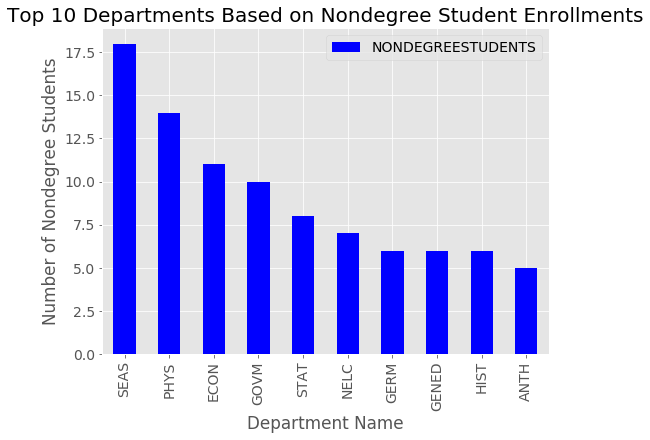

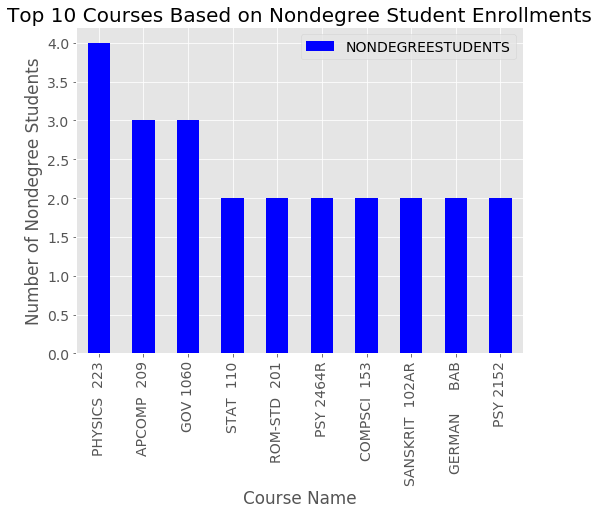

In [191]:
#plotting bar graphs to display the top 10 departments and courses with highest number of nondegree student enrollments
dept[['NONDEGREESTUDENTS']].sort_values('NONDEGREESTUDENTS', ascending=False).head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Departments Based on Nondegree Student Enrollments', fontsize = 20)
plt.xlabel('Department Name')
plt.ylabel('Number of Nondegree Students');

course[['NONDEGREESTUDENTS']].sort_values('NONDEGREESTUDENTS', ascending=False).head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Courses Based on Nondegree Student Enrollments', fontsize = 20)
plt.xlabel('Course Name')
plt.ylabel('Number of Nondegree Students');

- The top 5 departments with highest number of nondegree seeking student enrollments are:
  - School Of Engineering And Applied Sciences
  - Harvard Physics Department
  - Department of Economics
  - Department of Government 
  - Harvard Statistics Department

- PHYSICS 223 is the course with highest number of nondegree student enrollments, a course from the Harvard Department of Physics which consists of the second highest number of nondegree seeking students enrolled. 
- The top 5 courses displayed correlates with the top 5 departments with highest nondegree seeking students. The top 10 courses also include 2 language courses (Sanskrit and German) which implies that nondegree seeking students have varied interests. 

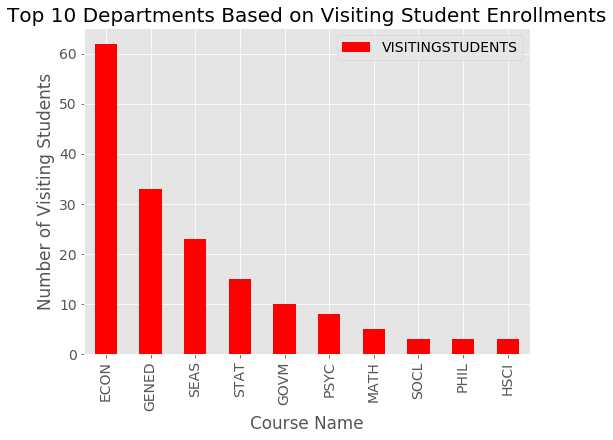

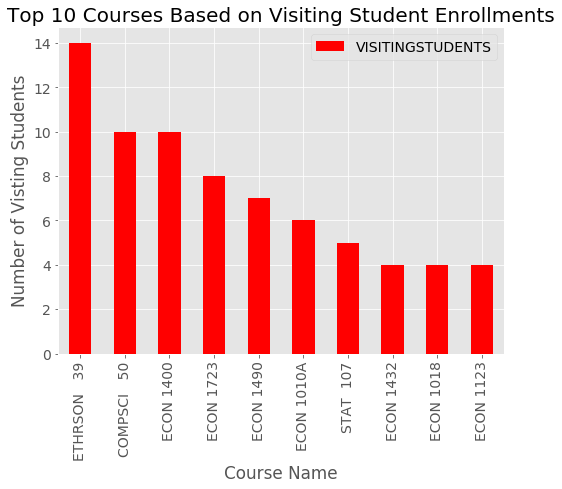

In [192]:
#plotting bar graphs to display the top 10 departments and courses with highest number of visiting student enrollments
dept[['VISITINGSTUDENTS']].sort_values('VISITINGSTUDENTS', ascending=False).head(10).plot(kind='bar', color='red')
plt.title('Top 10 Departments Based on Visiting Student Enrollments', fontsize = 20)
plt.xlabel('Course Name')
plt.ylabel('Number of Visiting Students');

course[['VISITINGSTUDENTS']].sort_values('VISITINGSTUDENTS', ascending=False).head(10).plot(kind='bar', color='red')
plt.title('Top 10 Courses Based on Visiting Student Enrollments', fontsize = 20)
plt.xlabel('Course Name')
plt.ylabel('Number of Visting Students');

- The top 5 departments with highest number of visiting student enrollments are:
  - Department of Economics
  - Harvard College Program in General Education
  - School Of Engineering And Applied Sciences
  - Harvard Statistics Department
  - Department of Government 

- ETHRSON 39 is a course on Money, Markets, and Morals from the Faculty of Arts and Sciences, which has the highest number of visiting student enrollments. However, the Faculty of Arts and Sciences is not displayed among the top 10 departments with the highest number of visiting students enrolled. This is an anomaly and will be further explored in future analysis of data. 
- 7 out of the top 10 courses are Economics courses from the Department of Economics, which has the highest number of visiting students enrolled.

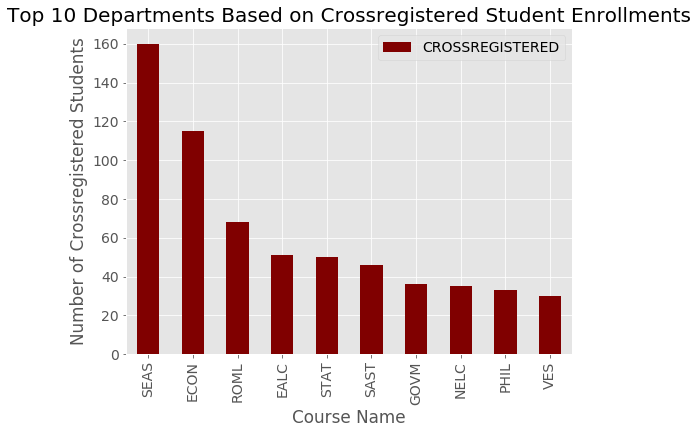

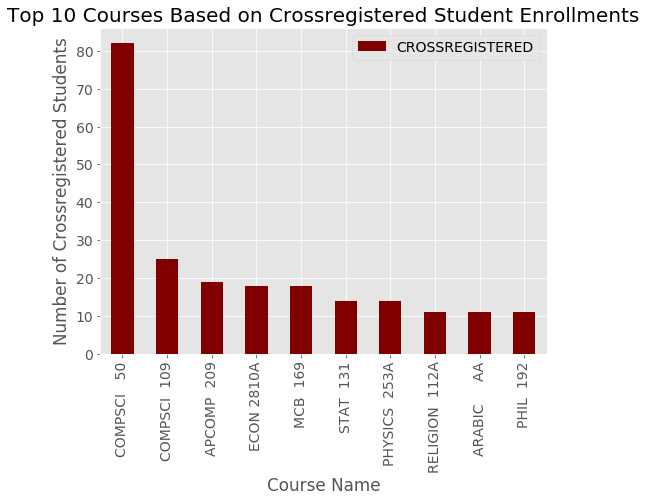

In [193]:
#plotting bar graphs to display the top 10 departments and courses with highest number of crossregistered student enrollments
dept[['CROSSREGISTERED']].sort_values('CROSSREGISTERED', ascending=False).head(10).plot(kind='bar', color='maroon')
plt.title('Top 10 Departments Based on Crossregistered Student Enrollments', fontsize = 20)
plt.xlabel('Course Name')
plt.ylabel('Number of Crossregistered Students');

course[['CROSSREGISTERED']].sort_values('CROSSREGISTERED', ascending=False).head(10).plot(kind='bar', color='maroon')
plt.title('Top 10 Courses Based on Crossregistered Student Enrollments', fontsize = 20)
plt.xlabel('Course Name')
plt.ylabel('Number of Crossregistered Students');

- The top 5 departments with highest number of cross registered student enrollments are:
  - School Of Engineering And Applied Sciences
  - Department of Economics
  - ROML (unable to locate the full name of this department on the Harvard University site)
  - Department of East Asian Languages and Civilizations
  - Harvard Statistics Department

- COMPSCI 50 & COMPSCI 109 have the highest number of cross registered student enrollments which falls within the School Of Engineering And Applied Sciences department, listed as the department with the highest number of cross registered student enrollments. 
- Cross registered students also have varied interests and is the only student category with enrollments in courses from the Department of East Asian Languages and Civilizations.


##### Based on the above analysis of all student categories, the Harvard School Of Engineering And Applied Sciences and the Harvard Department of Economics are the most popular departments, which fall under the top 5 departments for all student categories.

In [194]:
# the course, department, graduate and undergraduate student columns have been assigned to an 'important_cols' list
important_cols = ['COURSE', 'DEPARTMENT', 'GRADSTUDENTS', 'UNDERGRADSTUDENTS']

Cond1 filters for the department with highest number of students enrollments (Harvard Medical School) and Cond2 filters for graduate students above the mean number of graduate students by department. The course displayed below is MED-SCI 300QC from the Harvard Medical School department.

In [195]:
cond1 = (harvard['DEPARTMENT'] == 'MDSC')
cond2 = (harvard['GRADSTUDENTS'] > 116)
harvard[cond1 & cond2][important_cols]

,COURSE,DEPARTMENT,GRADSTUDENTS,UNDERGRADSTUDENTS
COURSEID,,,,
127507.0,MED-SCI 300QC,MDSC,144.0,0.0


Cond3 filters for the department with highest number of undergraduate students (Harvard College Program in General Education) and Cond4 filters for undergraduate students above the mean number of undergraduate students by course. 

In [196]:
cond3 = (harvard['DEPARTMENT'] == 'GENED')
cond4 = (harvard['UNDERGRADSTUDENTS'] > 396)
harvard[cond3 & cond4][important_cols]

,COURSE,DEPARTMENT,GRADSTUDENTS,UNDERGRADSTUDENTS
COURSEID,,,,
156035.0,ETHRSON 39,GENED,0.0,510.0


In [197]:
#correlation between Total Enrollment and each of the student categories. The undergraduate students have the highest correlation.
harvard[special_cols].corr()[['TOTALENROLLMENT']].sort_values('TOTALENROLLMENT', ascending = False)

,TOTALENROLLMENT
TOTALENROLLMENT,1.000000
UNDERGRADSTUDENTS,0.979913
VISITINGSTUDENTS,0.530498
CROSSREGISTERED,0.440221
GRADSTUDENTS,0.149837
NONDEGREESTUDENTS,0.147438


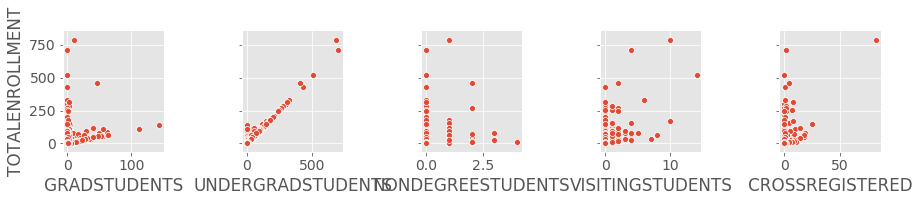

In [198]:
#The scatterplots below display the correlation between each student category and the total enrollments. 
#As displayed below, there is a linear relationship between undergraduate students and totalenrollments. 
#Nondegree seeking students are not highly correlated with the total enrollments. 
sns.pairplot(harvard, y_vars=['TOTALENROLLMENT'], x_vars=['GRADSTUDENTS', 'UNDERGRADSTUDENTS', 'NONDEGREESTUDENTS', 'VISITINGSTUDENTS', 'CROSSREGISTERED'],
            );

In [199]:
y = harvard['TOTALENROLLMENT']
X = harvard[['UNDERGRADSTUDENTS']]
lr = LinearRegression()

In [200]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [201]:
lr.score(X, y) #displays R squared

0.9602293091985302

In [202]:
B1 = lr.coef_[0]
B1

1.0223332754761842

In [203]:
B0 = lr.intercept_
B0

3.3789481700595427

In [204]:
#Equation of the slope
pred = [B0 + (B1 * x) for x in range(0, 700, 1)]

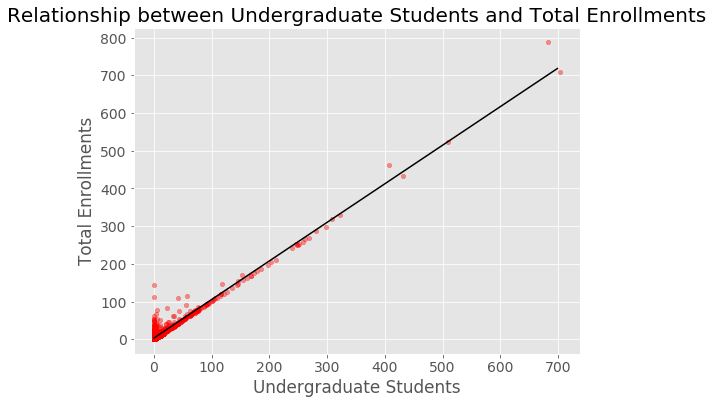

In [205]:
#The regression line below displays a positive linear relationship between undergraduate students and total enrollments. 
#There are only two outliers in the graph below (two data points with total enrollments greater than 700).
harvard.plot(kind='scatter', x='UNDERGRADSTUDENTS', y='TOTALENROLLMENT', color='red', alpha=0.4)
plt.title('Relationship between Undergraduate Students and Total Enrollments', fontsize = 20);
plt.xlabel('Undergraduate Students')
plt.ylabel('Total Enrollments')
plt.plot(pred, color='black');

In [206]:
y = harvard['TOTALENROLLMENT']
X = harvard[['GRADSTUDENTS']]
lr = LinearRegression()

In [207]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [208]:
lr.score(X, y) #displays R squared

0.02245120189109684

In [209]:
B1 = lr.coef_[0]
B1

0.8330603477399802

In [210]:
B0 = lr.intercept_
B0

11.550971317879533

In [211]:
#Equation of the slope
pred = [B0 + (B1 * x) for x in range(0, 160, 1)]

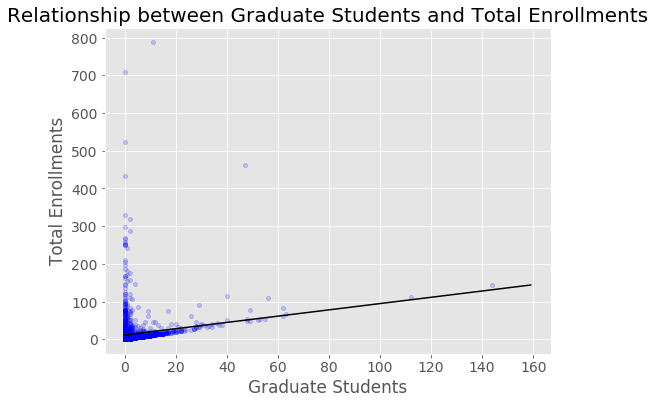

In [212]:
#The scatterplot below displays a generally linear relationship between graduate students and total enrollments. 
#When graduate students are greater than 10, the total enrollments are increasing and there is a linear relationship. 
#The r squared is low because there appears to be a cluster of data points between 0-5 graduate students, where there is no
#linear relationship with total enrollments. 
harvard.plot(kind='scatter', x='GRADSTUDENTS', y='TOTALENROLLMENT', color='blue', alpha=0.2)
plt.title('Relationship between Graduate Students and Total Enrollments', fontsize = 20);
plt.xlabel('Graduate Students')
plt.ylabel('Total Enrollments')
plt.plot(pred, color='black');

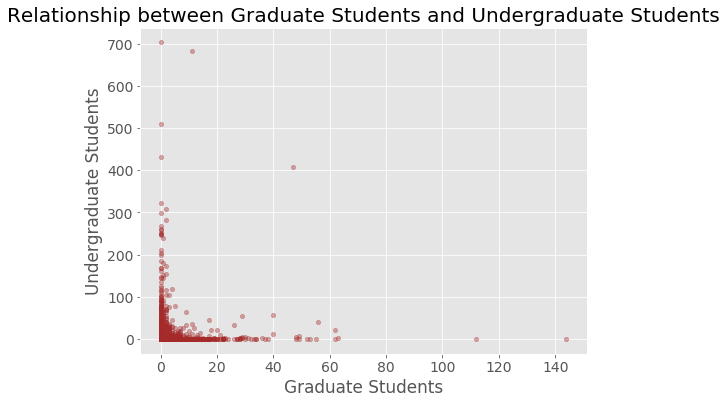

In [213]:
#the scatterplot below displays that graduate and undergraduate students do not have a strong linear relationship.
harvard.plot(kind='scatter', x='GRADSTUDENTS', y='UNDERGRADSTUDENTS', color='brown', alpha = 0.4)
plt.title('Relationship between Graduate Students and Undergraduate Students', fontsize = 20)
plt.xlabel('Graduate Students')
plt.ylabel('Undergraduate Students');